In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [8]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
#import mne
import os


In [34]:
patient_information = 'DATA/data_2states.txt'
data_file = 'RESULTS/wPLI_Distance/DimRed_wPLI.csv'

In [35]:
info = pd.read_csv(patient_information, sep = '\t')
info

,Patient,Diag,Age,Sex,Injury,TSI,State,CRSR,Outcome_Diag,Group_Diag,Outcome_Prog,Group_Prog
0,WSAS02,UWS,29,M,TBI,-,Acute,4,1,UWS,1,Recovered
1,WSAS05,MCS,28,M,TBI,9 Y,Chronic,10,2,MCS,3,Unknown
2,WSAS09,UWS,50,F,Stroke,25 D,Acute,4,1,UWS,1,Recovered
3,WSAS10,UWS,75,F,Stroke,NaN,Acute,5,1,UWS,0,Non-recovered
4,WSAS11,UWS,28,F,Anoxic,1Y,Chronic,6,1,UWS,0,Non-recovered
5,WSAS12,MCS,36,F,TBI,2Y,Chronic,11,2,MCS,0,Non-recovered
6,WSAS13,UWS,24,M,Anoxic,8Y,Chronic,5,1,UWS,0,Non-recovered
7,WSAS17,Coma,74,F,Anoxic,10D,Acute,0,0,Coma,0,Non-recovered
8,WSAS18,UWS,53,F,Anoxic,9M,Chronic,5,1,UWS,0,Non-recovered
9,WSAS19,Coma,40,M,Stroke,5D,Acute,0,0,Coma,3,Unknown


In [36]:
data = pd.read_csv(data_file, sep = ';')
data

FileNotFoundError: [Errno 2] No such file or directory: 'RESULTS/wPLI_Distance/DimRed_wPLI.csv'

In [20]:
data['Outcome']=info['Group_Prog']
data['CRSR']=info['CRSR']


In [31]:
data_reco=data.query('Outcome =="Recovered"')
data_nonreco=data.query('Outcome =="Non-recovered"')

In [33]:
sns.regplot(x="CRSR", y="BaseNorm_B_Dist_Base_Anes", data=data);

KeyError: 'BaseNorm_B_Dist_Base_Anes'

<AxesSubplot:title={'center':'Norm_B_Dist_Base_Anes'}, xlabel='[Outcome]'>

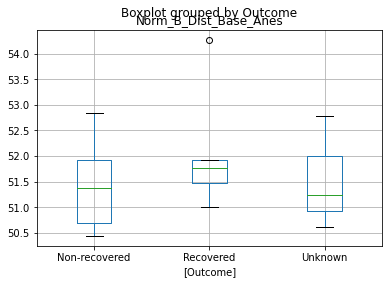

In [18]:
data[['Outcome','Norm_B_Dist_Base_Anes']].boxplot(by='Outcome')